<a href="https://colab.research.google.com/github/fellipetenorio/alura-data-science/blob/main/ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
rating_url = 'https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv'


In [4]:
ratings = pd.read_csv(rating_url)

In [5]:
ratings.shape

(100836, 4)

In [6]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [7]:
ratings['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

In [8]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
ratings['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

<Axes: >

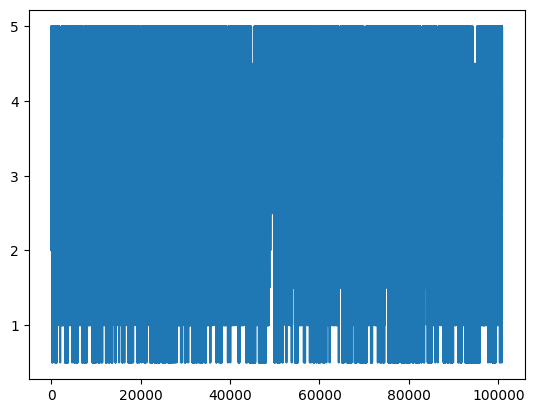

In [10]:
ratings['rating'].plot()

<Axes: ylabel='Frequency'>

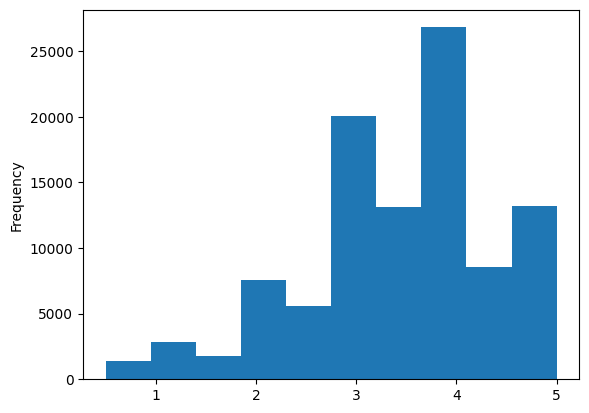

In [11]:
ratings['rating'].plot(kind='hist')

In [12]:
mediana = ratings["rating"].median()
media = ratings["rating"].mean()
print(f"Mediana é {mediana}")
print(f"Média é {media}")
ratings['rating'].describe()

Mediana é 3.5
Média é 3.501556983616962


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<Axes: ylabel='rating'>

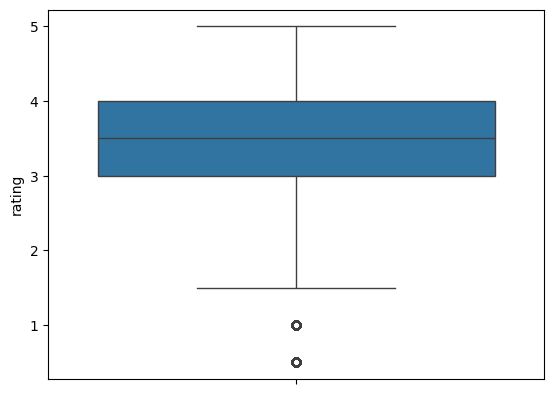

In [13]:
sns.boxplot(ratings['rating'])

# Pandas Series e DataFrame

In [14]:
import pandas as pd

# Criando um DataFrame simples
dados = { 'Nome': ['Mirla', 'Ana', 'Daniel'],
   'Idade': [25, 30, 35],
              'Salario': [5000, 6000, 8000]}
df = pd.DataFrame(dados)
df

,Nome,Idade,Salario
0,Mirla,25,5000
1,Ana,30,6000
2,Daniel,35,8000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nome     3 non-null      object
 1   Idade    3 non-null      int64 
 2   Salario  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [16]:
# Criando um Series simples
idades = pd.Series([45, 30, 45, 40, 25])
idades

0    45
1    30
2    45
3    40
4    25
dtype: int64

In [17]:
idades.index

RangeIndex(start=0, stop=5, step=1)

# 02. Analisando os dados

In [18]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
notas = ratings
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [21]:
# media do filmeId 1 (Toy Story)
notas.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [22]:
# media de cada filme
medias_por_filme = notas.groupby("filmeId")["nota"].mean()

In [23]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [24]:
medias_por_filme.value_counts()

nota
4.000000    1010
3.000000     917
3.500000     912
2.500000     521
2.000000     443
            ... 
1.928571       1
3.812000       1
2.922222       1
4.078014       1
4.280000       1
Name: count, Length: 1286, dtype: int64

<Axes: ylabel='Frequency'>

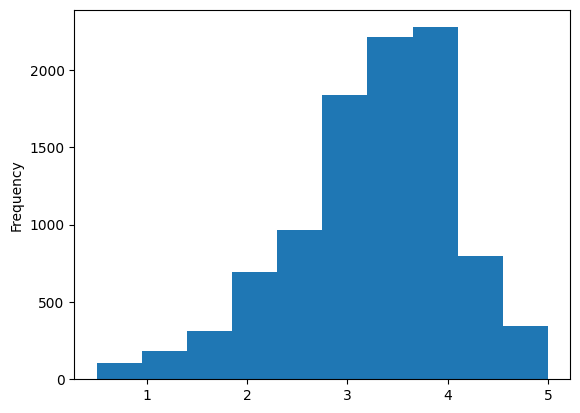

In [25]:
medias_por_filme.plot(kind="hist")

# 03 Consulta em um DataFrame

In [29]:
import pandas as pd
vendas = pd.read_csv("/content/sample_data/serenatto_2sem_2023.csv")

In [30]:
vendas.head()

,id,data,produto,valor,metodo_pagamento
0,2720,2023-07-01,Risoto de Funghi,13.0,Cartão de Débito
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
3,2723,2023-07-02,Ratatouille,8.5,PIX
4,2724,2023-07-03,Ratatouille,8.5,Dinheiro


In [42]:
# 1. Somatório de todas as vendas de “Ratatouille” do período;
print(vendas.query('produto=="Ratatouille"').valor.sum())

# 2. Frequência dos métodos de pagamento para o “Ratatouille”.
print(vendas.query('produto=="Ratatouille"')['metodo_pagamento'].value_counts())

323.0
metodo_pagamento
PIX                  13
Cartão de Débito     10
Dinheiro              9
Cartão de Crédito     6
Name: count, dtype: int64


count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

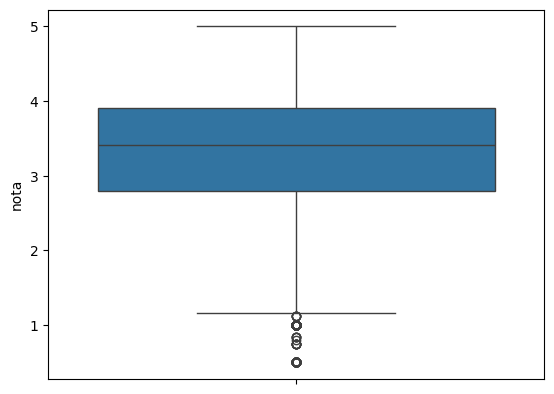

In [44]:
sns.boxplot(medias_por_filme)
medias_por_filme.describe()

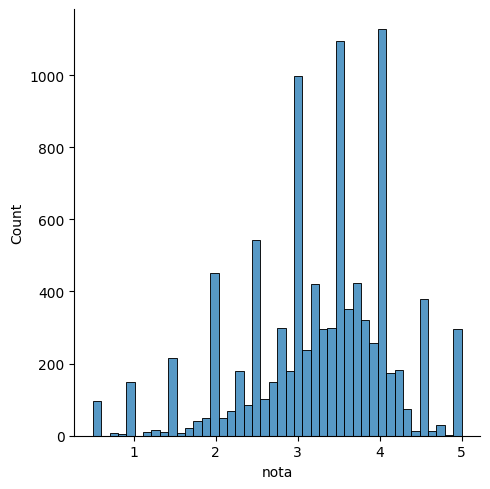

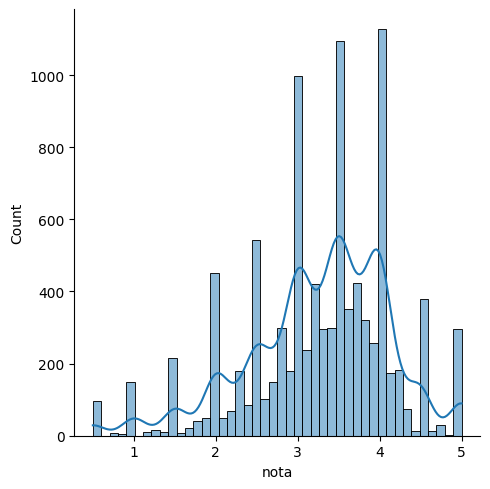

In [46]:
sns.displot(medias_por_filme)
sns.displot(medias_por_filme, kde=True)

In [48]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das médias dos filmes')

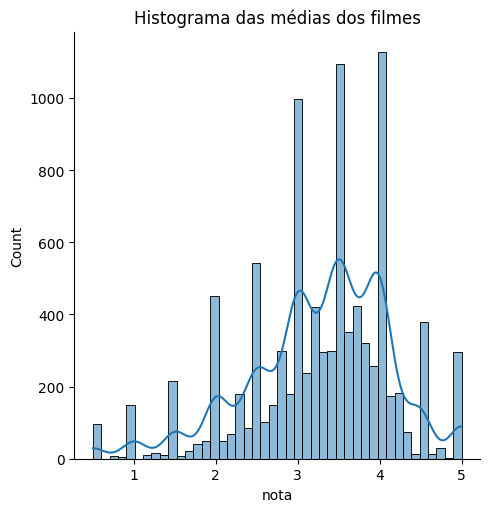

In [57]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")
